In [3]:
from time import time
import unittest
import numpy as np
from sklearn.metrics import silhouette_score
from statsmodels.tools.eval_measures import rmse

import os
os.environ["CUDA_VISIBLE_DEVICES"] = '1' 

from keras.datasets import mnist
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
# config.gpu_options.per_process_gpu_memory_fraction = 0.48
set_session(tf.Session(config=config))

import sys  
sys.path.append('../')
from util.util import *
from util import importNotebook
from module.autoencoder import AE

In [5]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()
xTrain = xTrain.astype('float32') / 255.
xTest = xTest.astype('float32') / 255.
numTrain = len(xTrain)
numTest = len(xTest)
numClass = 10
sizeDigit = xTrain.shape[1:]

dimInput = np.prod(sizeDigit)
xTrain = xTrain.reshape((numTrain, dimInput))
xTest = xTest.reshape((numTest, dimInput))
print(xTrain.shape)
print(xTest.shape)

(60000, 784)
(10000, 784)


# Default parameters

In [7]:
pathTempBest = '../model/temp/'
ae = AE(dimInput)
history, timeTrain = ae.fit(xTrain, xTest, 
                            pathTempBest=pathTempBest)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 12s 206us/step - loss: 0.2523 - val_loss: 0.2201

Epoch 00001: val_loss improved from inf to 0.22015, saving model to ../model/temp//AutoEncoder1536633639.539582.hdf5
Epoch 2/50
60000/60000 [==============================] - 11s 186us/step - loss: 0.2279 - val_loss: 0.2192

Epoch 00002: val_loss improved from 0.22015 to 0.21916, saving model to ../model/temp//AutoEncoder1536633639.539582.hdf5
Epoch 3/50
60000/60000 [==============================] - 11s 187us/step - loss: 0.2267 - val_loss: 0.2179

Epoch 00003: val_loss improved from 0.21916 to 0.21794, saving model to ../model/temp//AutoEncoder1536633639.539582.hdf5
Epoch 4/50
60000/60000 [==============================] - 11s 188us/step - loss: 0.2260 - val_loss: 0.2172

Epoch 00004: val_loss improved from 0.21794 to 0.21723, saving model to ../model/temp//AutoEncoder1536633639.539582.hdf5
Epoch 5/50
60000/60000 [==============

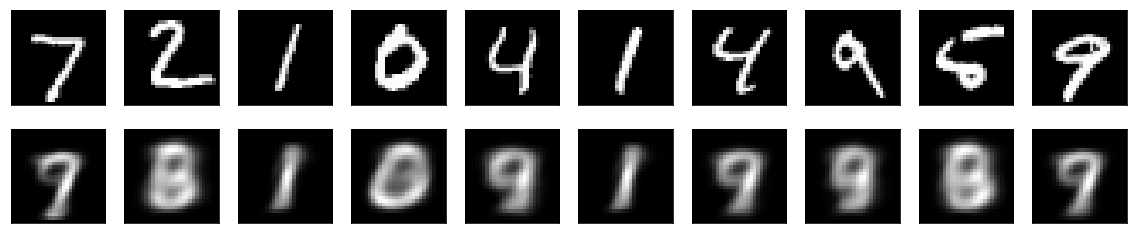

STD of each pixel:  0.19241829
mean of each pixel's RMSE:  0.16912441
total RMSE of each pixel:  0.22839636


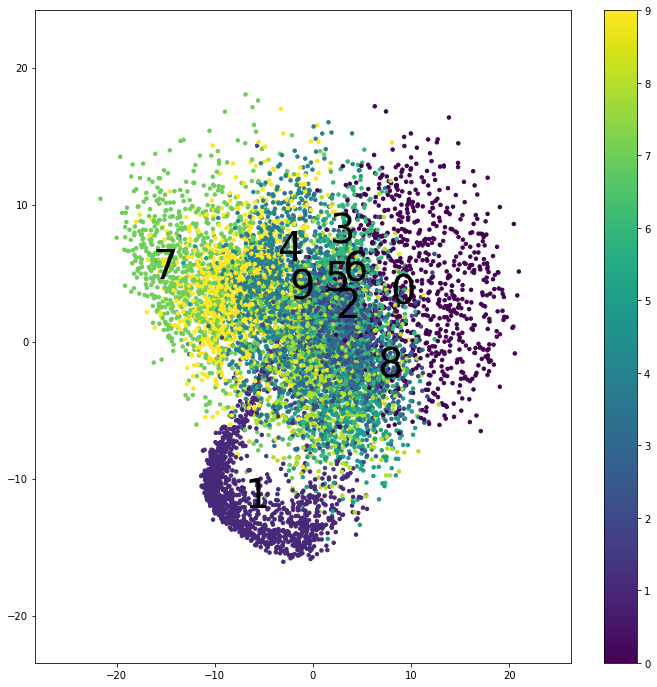

Silhouette score:  -0.00052570493


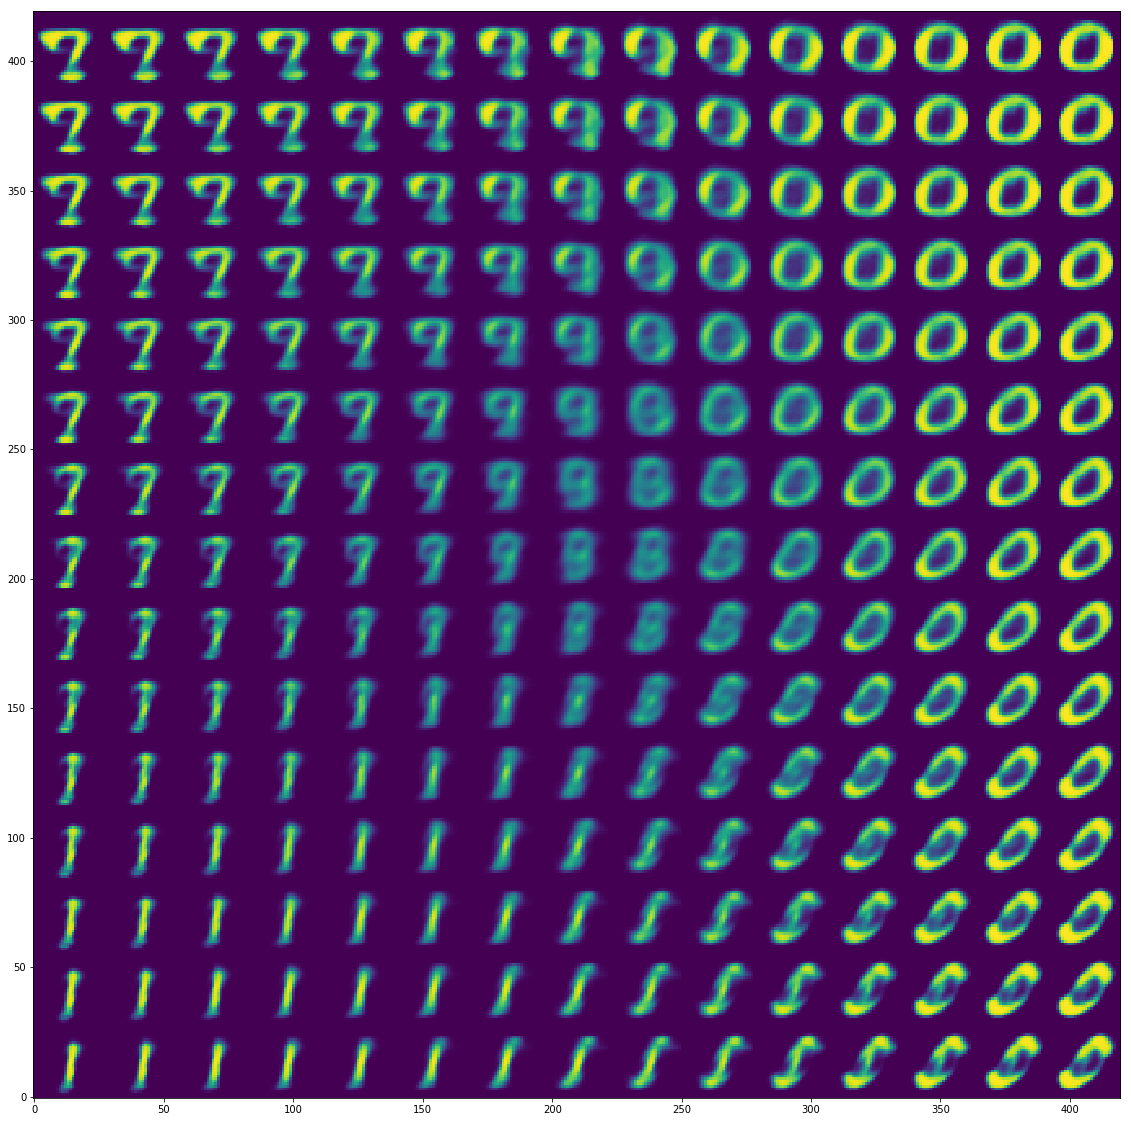

In [8]:
encoder = ae.encoder
decoder = ae.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
print("STD of each pixel: ", xTest.std(axis=0).mean())
print("mean of each pixel's RMSE: ", rmse(xTest, decodeTest, axis=0).mean())
print("total RMSE of each pixel: ", compReconst(xTest, decodeTest))

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=20000)
scoreSilh = silhouette_score(encodeTest, yTest)
print("Silhouette score: ", scoreSilh)

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)

# Without batch normalization

In [11]:
ae = AE(dimInput,  batchNorm=False)
history, timeTrain = ae.fit(xTrain, xTest, 
                            pathTempBest=pathTempBest)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 130us/step - loss: 0.2502 - val_loss: 0.2243

Epoch 00001: val_loss improved from inf to 0.22426, saving model to ../model/temp//AutoEncoder1536636223.3145294.hdf5
Epoch 2/50
60000/60000 [==============================] - 7s 118us/step - loss: 0.2282 - val_loss: 0.2197

Epoch 00002: val_loss improved from 0.22426 to 0.21970, saving model to ../model/temp//AutoEncoder1536636223.3145294.hdf5
Epoch 3/50
60000/60000 [==============================] - 7s 120us/step - loss: 0.2257 - val_loss: 0.2186

Epoch 00003: val_loss improved from 0.21970 to 0.21861, saving model to ../model/temp//AutoEncoder1536636223.3145294.hdf5
Epoch 4/50
60000/60000 [==============================] - 7s 118us/step - loss: 0.2247 - val_loss: 0.2175

Epoch 00004: val_loss improved from 0.21861 to 0.21753, saving model to ../model/temp//AutoEncoder1536636223.3145294.hdf5
Epoch 5/50
60000/60000 [==============

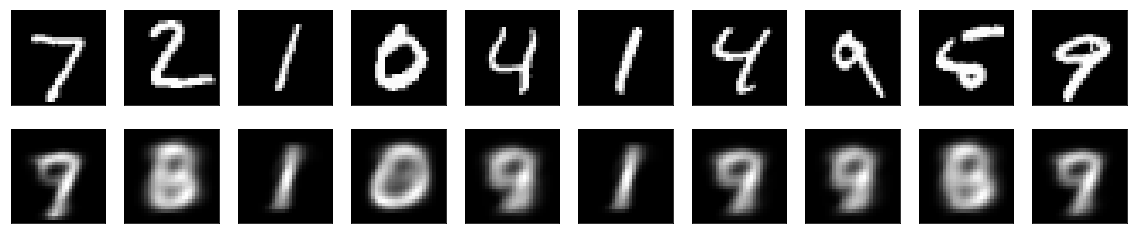

STD of each pixel:  0.19241829
mean of each pixel's RMSE:  0.16963753
total RMSE of each pixel:  0.22915655


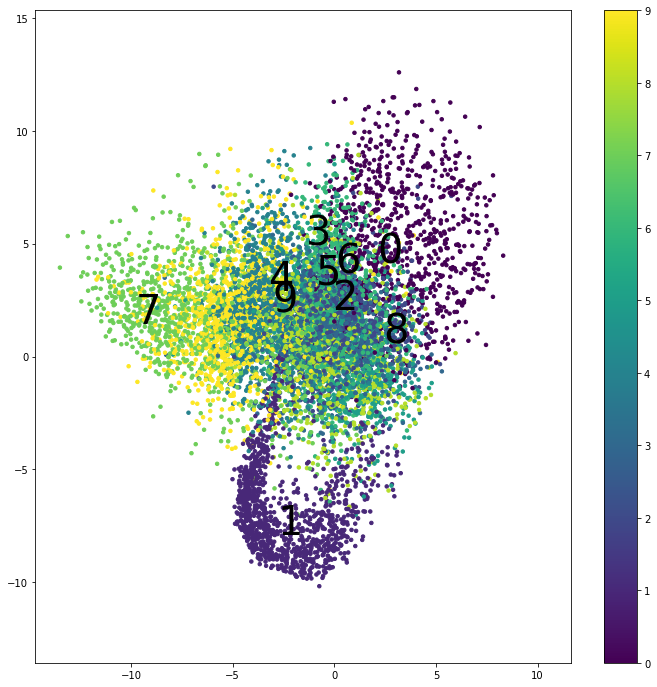

Silhouette score:  -0.0006868023


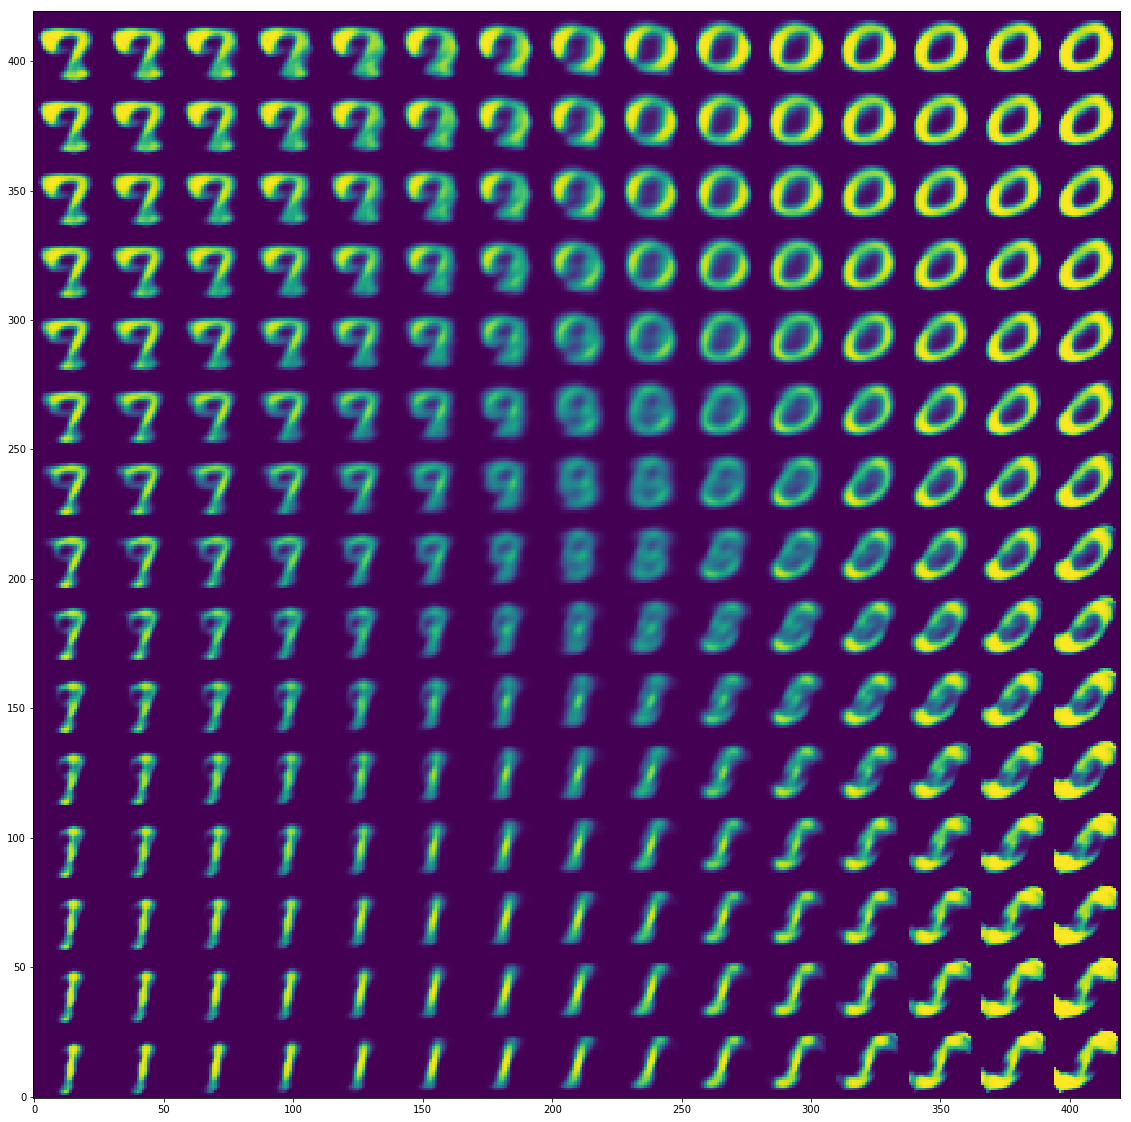

In [12]:
encoder = ae.encoder
decoder = ae.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
print("STD of each pixel: ", xTest.std(axis=0).mean())
print("mean of each pixel's RMSE: ", rmse(xTest, decodeTest, axis=0).mean())
print("total RMSE of each pixel: ", compReconst(xTest, decodeTest))

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=20000)
scoreSilh = silhouette_score(encodeTest, yTest)
print("Silhouette score: ", scoreSilh)

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)

# Deeper for dense layers

In [13]:
layerDense = [128, 32, 8, 2]

ae = AE(dimInput, layerDense=layerDense)
history, timeTrain = ae.fit(xTrain, xTest, 
                            pathTempBest=pathTempBest)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 27s 444us/step - loss: 0.2648 - val_loss: 0.2303

Epoch 00001: val_loss improved from inf to 0.23034, saving model to ../model/temp//AutoEncoder1536636354.4916244.hdf5
Epoch 2/50
60000/60000 [==============================] - 25s 410us/step - loss: 0.2429 - val_loss: 0.2278

Epoch 00002: val_loss improved from 0.23034 to 0.22782, saving model to ../model/temp//AutoEncoder1536636354.4916244.hdf5
Epoch 3/50
60000/60000 [==============================] - 25s 421us/step - loss: 0.2411 - val_loss: 0.2273

Epoch 00003: val_loss improved from 0.22782 to 0.22727, saving model to ../model/temp//AutoEncoder1536636354.4916244.hdf5
Epoch 4/50
60000/60000 [==============================] - 24s 402us/step - loss: 0.2405 - val_loss: 0.2267

Epoch 00004: val_loss improved from 0.22727 to 0.22671, saving model to ../model/temp//AutoEncoder1536636354.4916244.hdf5
Epoch 5/50
60000/60000 [==========

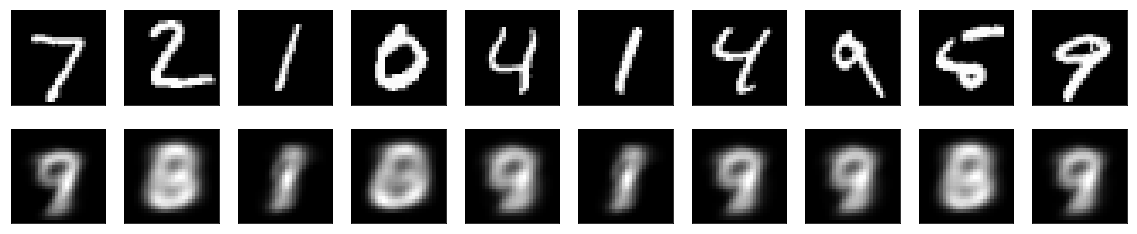

STD of each pixel:  0.19241829
mean of each pixel's RMSE:  0.17490302
total RMSE of each pixel:  0.23588778


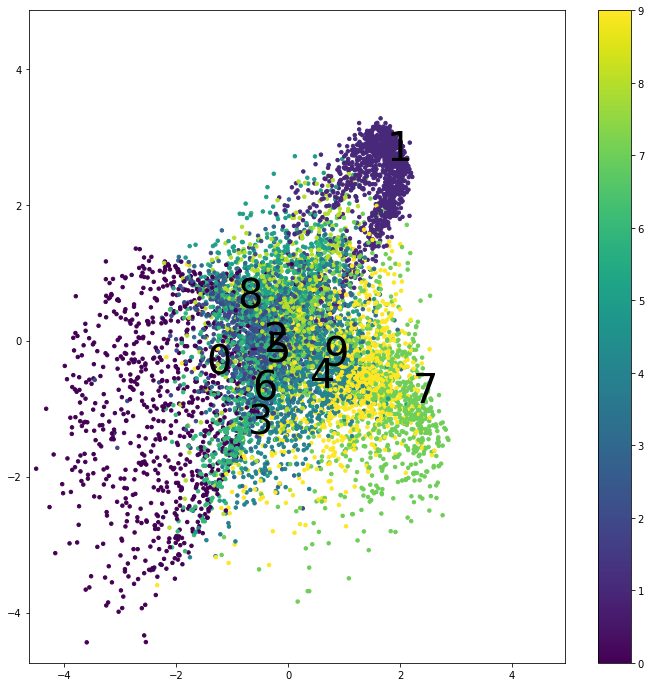

Silhouette score:  -0.0057501914


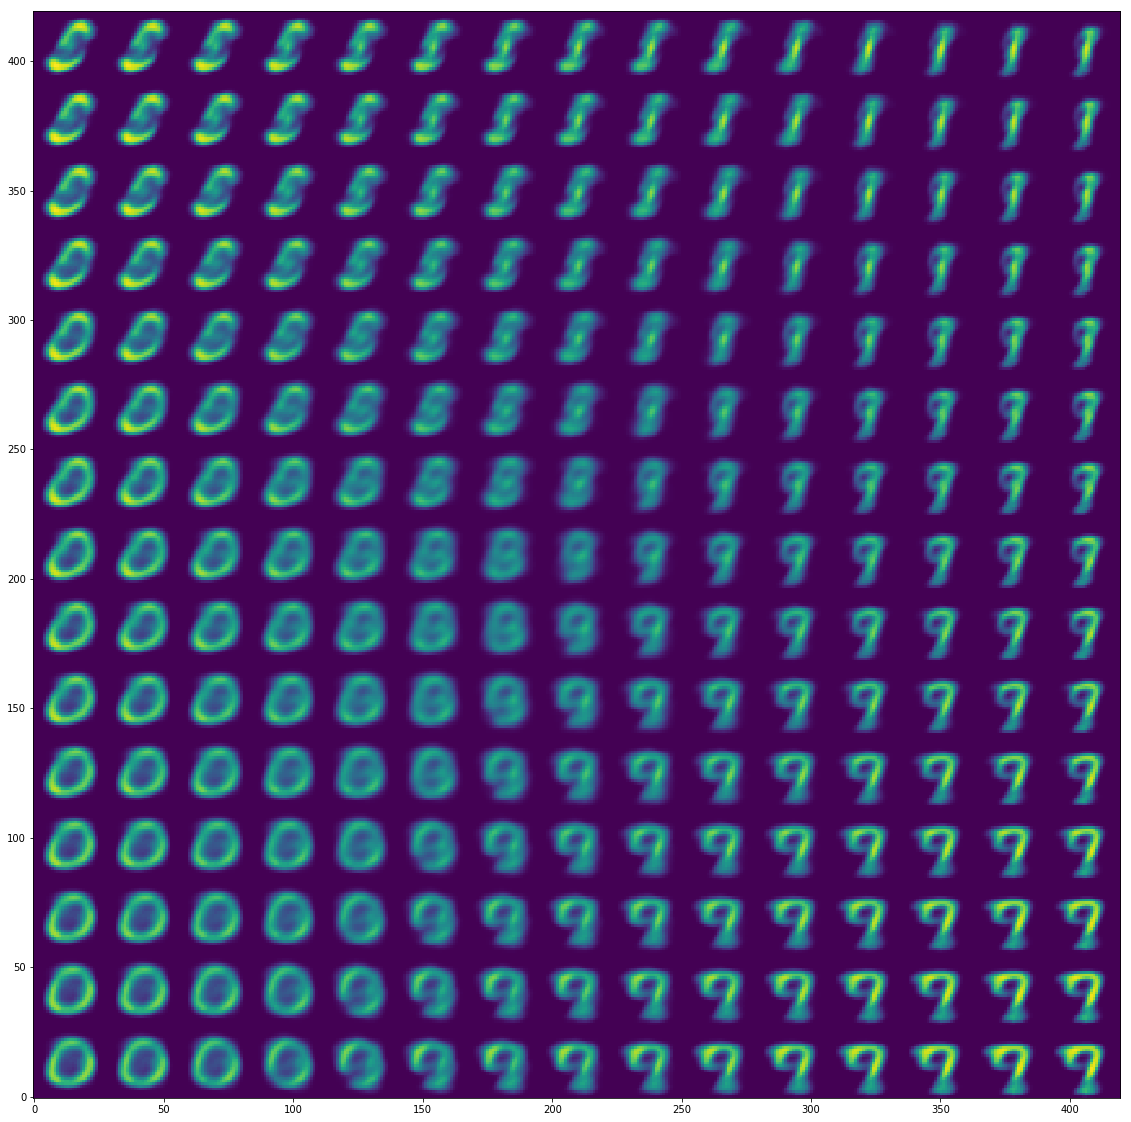

In [15]:
encoder = ae.encoder
decoder = ae.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
print("STD of each pixel: ", xTest.std(axis=0).mean())
print("mean of each pixel's RMSE: ", rmse(xTest, decodeTest, axis=0).mean())
print("total RMSE of each pixel: ", compReconst(xTest, decodeTest))

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=20000)
scoreSilh = silhouette_score(encodeTest, yTest)
print("Silhouette score: ", scoreSilh)

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)

# Dense use different activation

In [17]:
actDense = "relu"

ae = AE(dimInput, actDense=actDense)
history, timeTrain = ae.fit(xTrain, xTest, 
                            pathTempBest=pathTempBest)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 14s 232us/step - loss: 0.2514 - val_loss: 0.2193

Epoch 00001: val_loss improved from inf to 0.21932, saving model to ../model/temp//AutoEncoder1536642998.455523.hdf5
Epoch 2/50
60000/60000 [==============================] - 12s 201us/step - loss: 0.2271 - val_loss: 0.2166

Epoch 00002: val_loss improved from 0.21932 to 0.21658, saving model to ../model/temp//AutoEncoder1536642998.455523.hdf5
Epoch 3/50
60000/60000 [==============================] - 12s 200us/step - loss: 0.2245 - val_loss: 0.2137

Epoch 00003: val_loss improved from 0.21658 to 0.21367, saving model to ../model/temp//AutoEncoder1536642998.455523.hdf5
Epoch 4/50
60000/60000 [==============================] - 12s 201us/step - loss: 0.2229 - val_loss: 0.2121

Epoch 00004: val_loss improved from 0.21367 to 0.21208, saving model to ../model/temp//AutoEncoder1536642998.455523.hdf5
Epoch 5/50
60000/60000 [==============

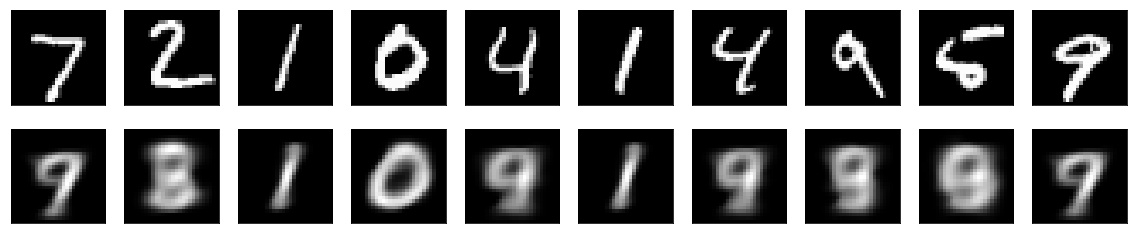

STD of each pixel:  0.19241829
mean of each pixel's RMSE:  0.16718112
total RMSE of each pixel:  0.22469075


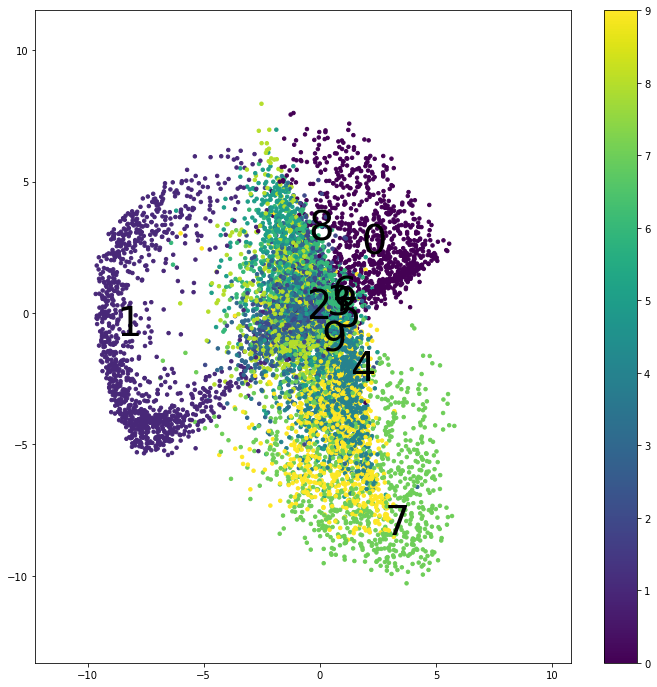

Silhouette score:  -0.032477647


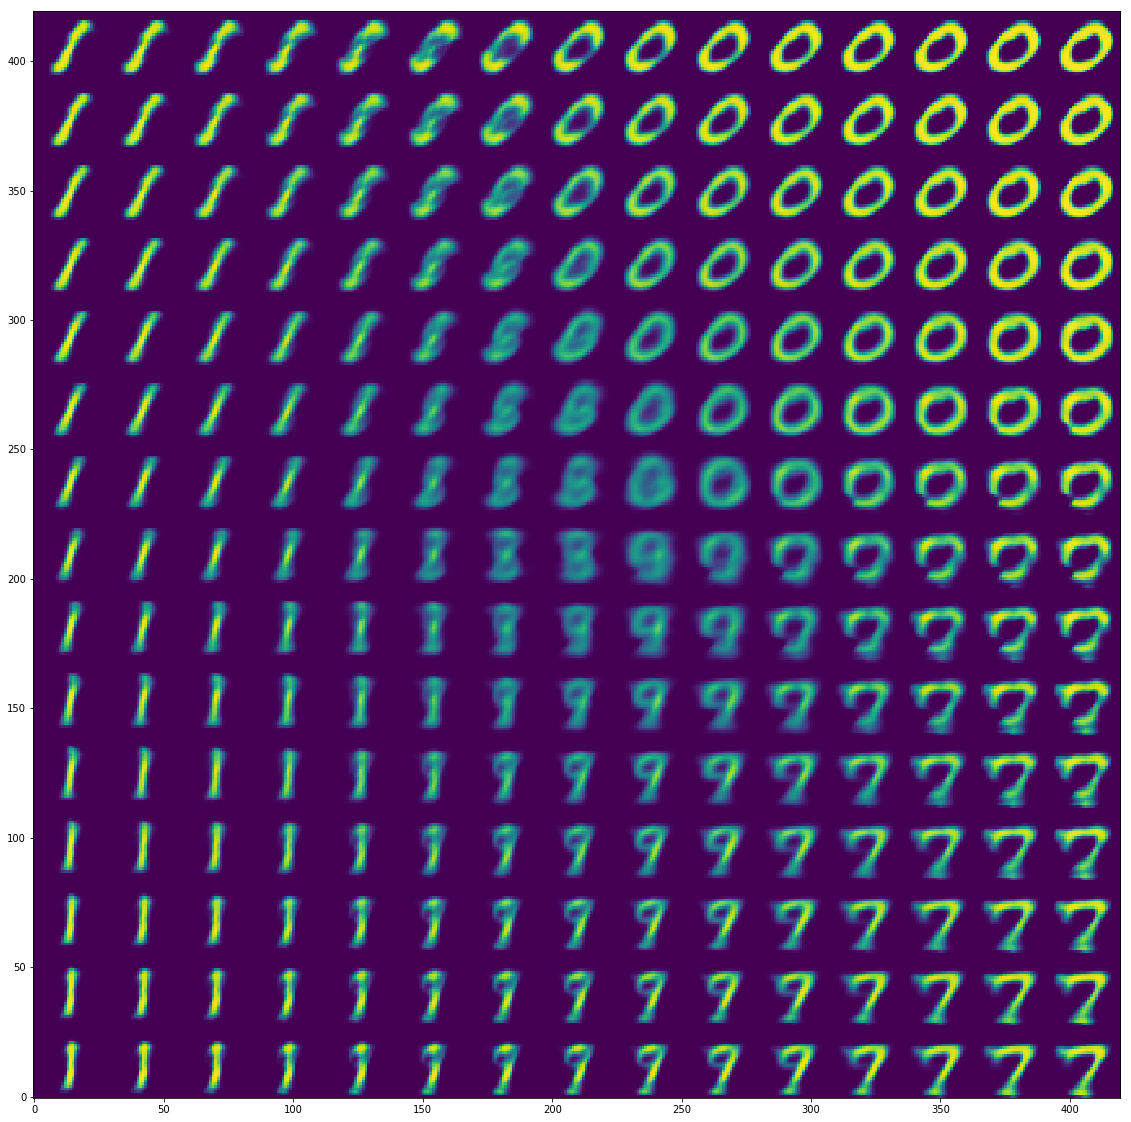

In [18]:
encoder = ae.encoder
decoder = ae.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
print("STD of each pixel: ", xTest.std(axis=0).mean())
print("mean of each pixel's RMSE: ", rmse(xTest, decodeTest, axis=0).mean())
print("total RMSE of each pixel: ", compReconst(xTest, decodeTest))

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=20000)
scoreSilh = silhouette_score(encodeTest, yTest)
print("Silhouette score: ", scoreSilh)

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)

# Conv use different activation

In [11]:
actConv = "relu"

convVAE = ConvVAE(dimInput, actConv=actConv)
history, timeTrain = convVAE.fit(xTrain, xTest, 
                                 pathTempBest=pathTempBest)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 16s 267us/step - loss: 0.2385 - val_loss: 0.2174

Epoch 00001: val_loss improved from inf to 0.21741, saving model to ../model/temp//AutoEncoder.01-0.24-0.22.hdf5
Epoch 2/50
60000/60000 [==============================] - 15s 246us/step - loss: 0.2214 - val_loss: 0.2129

Epoch 00002: val_loss improved from 0.21741 to 0.21285, saving model to ../model/temp//AutoEncoder.02-0.22-0.21.hdf5
Epoch 3/50
60000/60000 [==============================] - 15s 245us/step - loss: 0.2179 - val_loss: 0.2106

Epoch 00003: val_loss improved from 0.21285 to 0.21057, saving model to ../model/temp//AutoEncoder.03-0.22-0.21.hdf5
Epoch 4/50
60000/60000 [==============================] - 15s 251us/step - loss: 0.2155 - val_loss: 0.2081

Epoch 00004: val_loss improved from 0.21057 to 0.20806, saving model to ../model/temp//AutoEncoder.04-0.22-0.21.hdf5
Epoch 5/50
60000/60000 [==============================

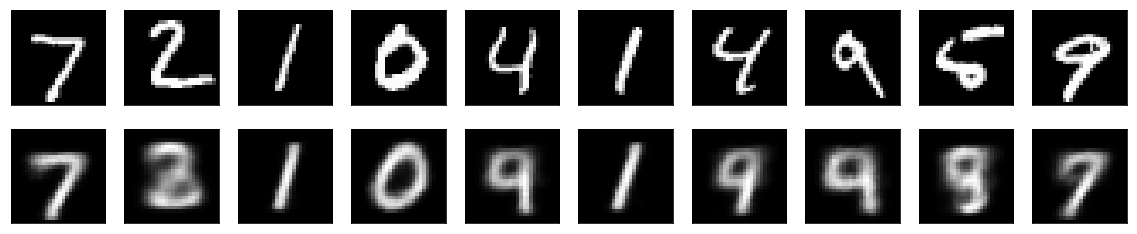

STD of each pixel:  0.19241829
mean of each pixel's RMSE:  0.15669309
total RMSE of each pixel:  0.20961109


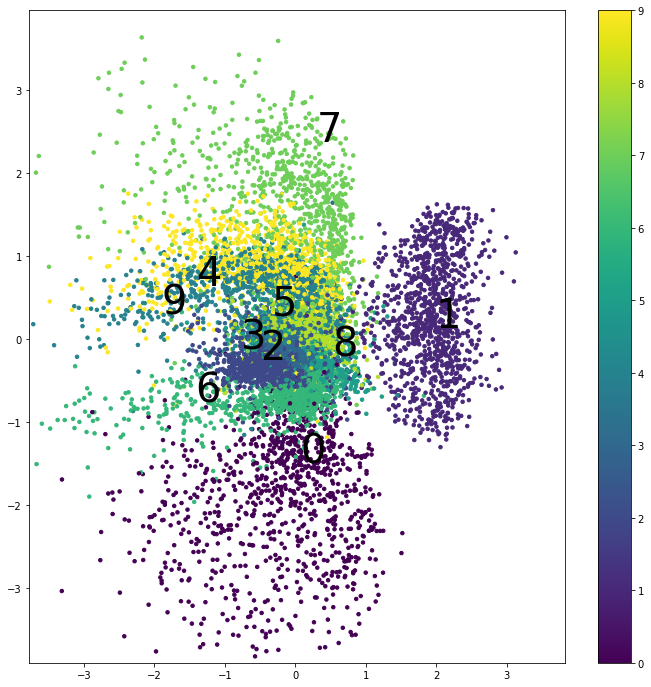

Silhouette score:  0.030123243


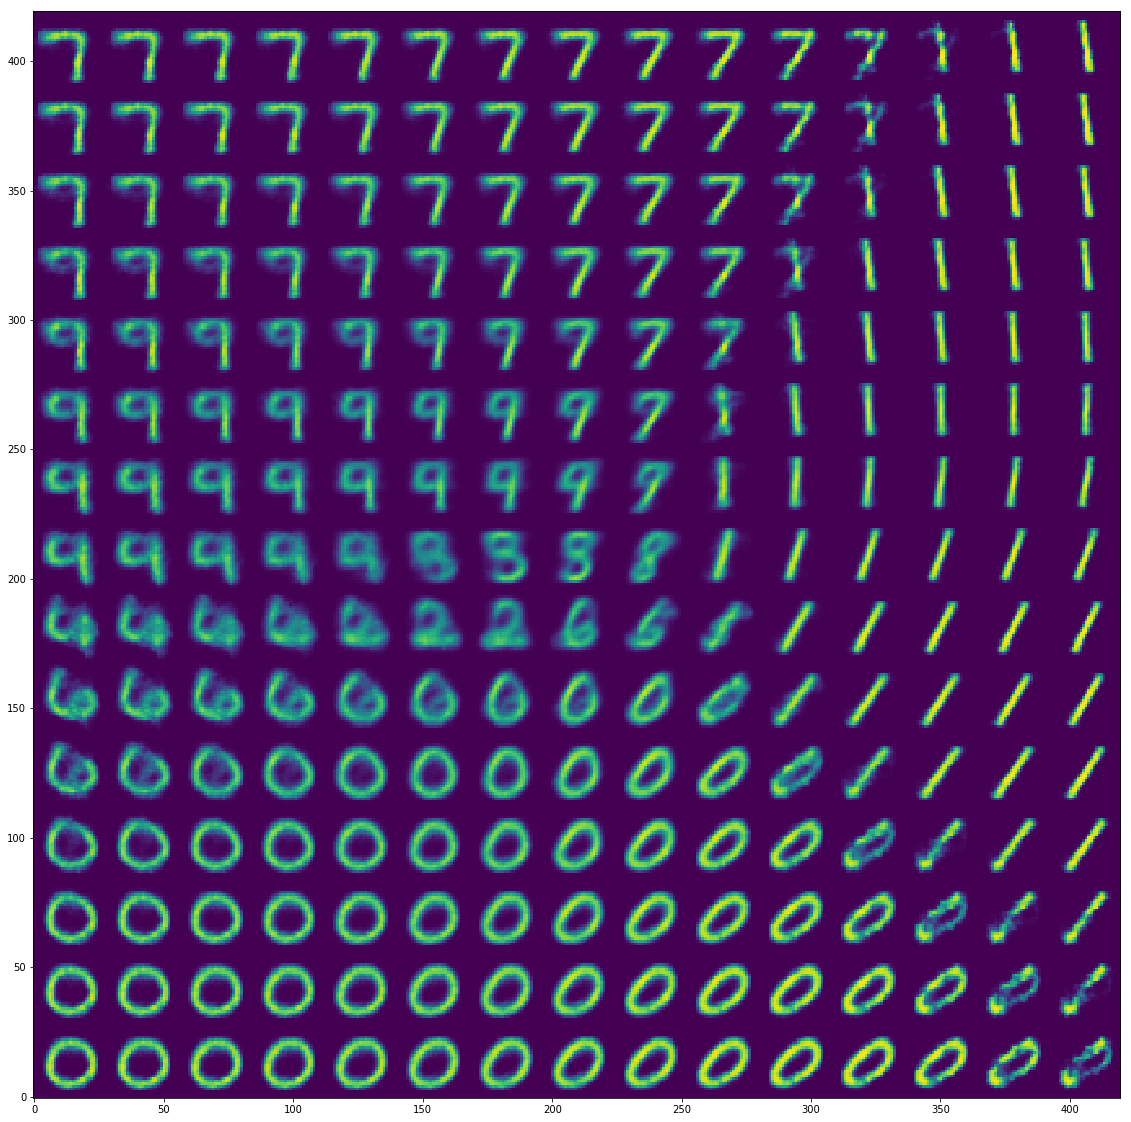

In [12]:
encoder = convVAE.encoder
decoder = convVAE.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
print("STD of each pixel: ", xTest.std(axis=0).mean())
print("mean of each pixel's RMSE: ", rmse(xTest, decodeTest, axis=0).mean())
print("total RMSE of each pixel: ", compReconst(xTest, decodeTest))

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=20000)
scoreSilh = silhouette_score(encodeTest, yTest)
print("Silhouette score: ", scoreSilh)

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)

# Larger batch size

In [13]:
sizeBatch = 128

convVAE = ConvVAE(dimInput)
history, timeTrain = convVAE.fit(xTrain, xTest, 
                                 sizeBatch=sizeBatch,
                                 pathTempBest=pathTempBest)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 91us/step - loss: 0.2641 - val_loss: 0.2260

Epoch 00001: val_loss improved from inf to 0.22601, saving model to ../model/temp//AutoEncoder.01-0.26-0.23.hdf5
Epoch 2/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.2305 - val_loss: 0.2213

Epoch 00002: val_loss improved from 0.22601 to 0.22128, saving model to ../model/temp//AutoEncoder.02-0.23-0.22.hdf5
Epoch 3/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.2271 - val_loss: 0.2192

Epoch 00003: val_loss improved from 0.22128 to 0.21918, saving model to ../model/temp//AutoEncoder.03-0.23-0.22.hdf5
Epoch 4/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.2246 - val_loss: 0.2169

Epoch 00004: val_loss improved from 0.21918 to 0.21689, saving model to ../model/temp//AutoEncoder.04-0.22-0.22.hdf5
Epoch 5/50
60000/60000 [==============================] - 4s 6

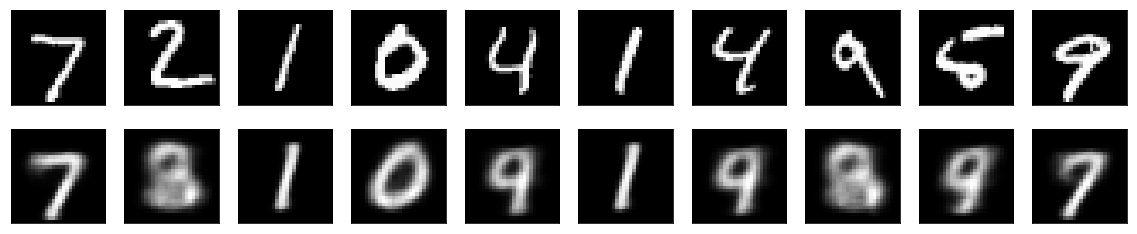

STD of each pixel:  0.19241829
mean of each pixel's RMSE:  0.15990837
total RMSE of each pixel:  0.21436377


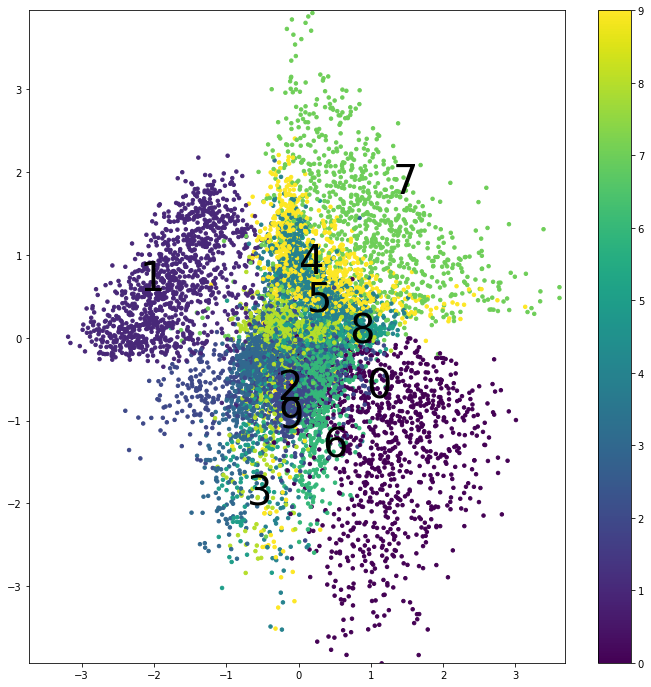

Silhouette score:  0.023617284


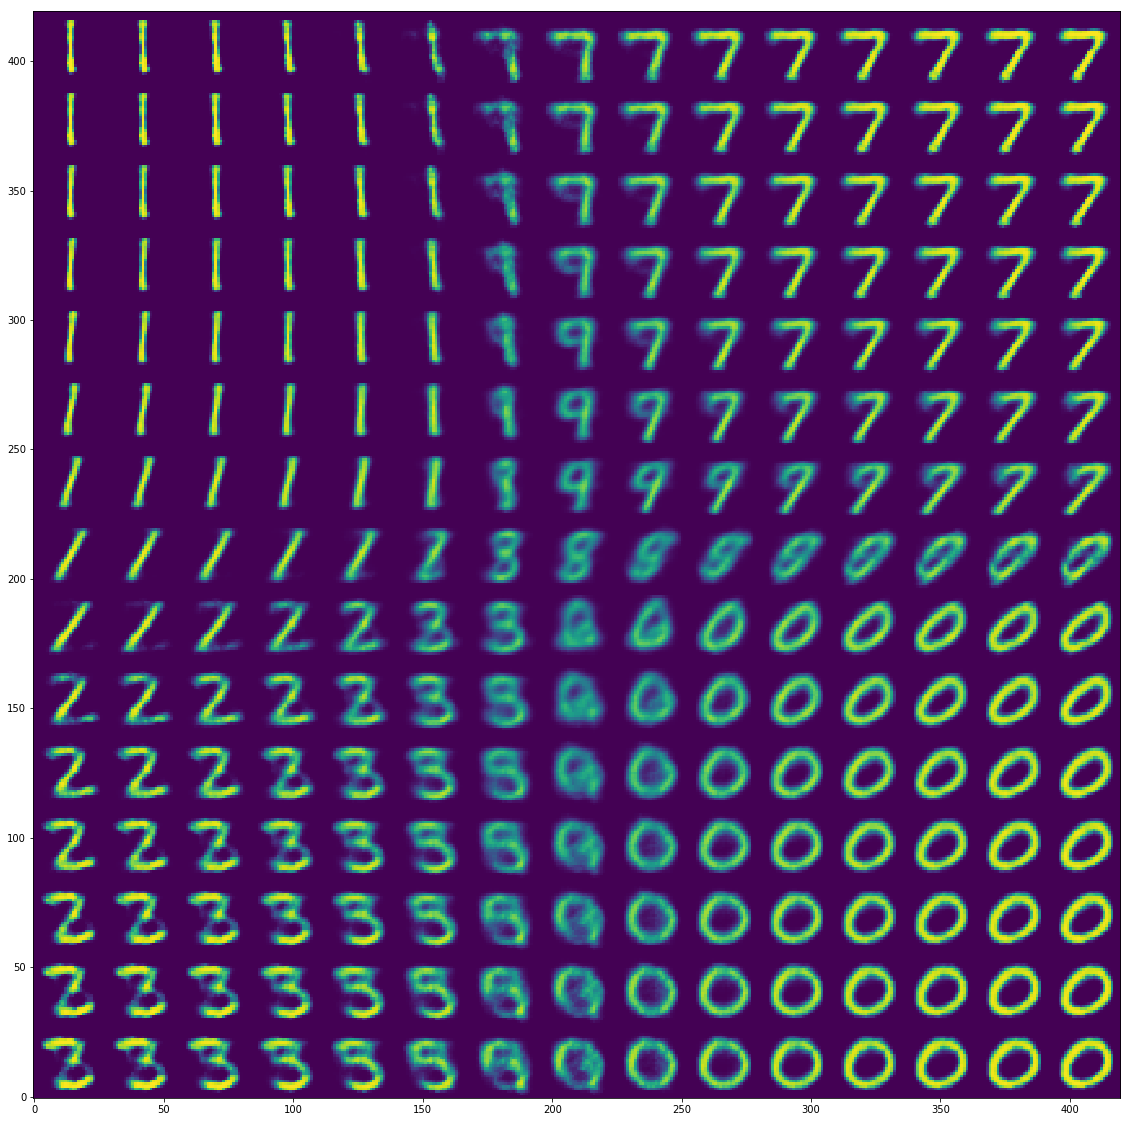

In [14]:
encoder = convVAE.encoder
decoder = convVAE.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
print("STD of each pixel: ", xTest.std(axis=0).mean())
print("mean of each pixel's RMSE: ", rmse(xTest, decodeTest, axis=0).mean())
print("total RMSE of each pixel: ", compReconst(xTest, decodeTest))

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=20000)
scoreSilh = silhouette_score(encodeTest, yTest)
print("Silhouette score: ", scoreSilh)

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)

# smaller batch size

In [18]:
sizeBatch = 8

convVAE = ConvVAE(dimInput)
history, timeTrain = convVAE.fit(xTrain, xTest, 
                                 sizeBatch=sizeBatch,
                                 pathTempBest=pathTempBest)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 65s 1ms/step - loss: 0.2316 - val_loss: 0.2181

Epoch 00001: val_loss improved from inf to 0.21813, saving model to ../model/temp//AutoEncoder.01-0.23-0.22.hdf5
Epoch 2/50
60000/60000 [==============================] - 64s 1ms/step - loss: 0.2216 - val_loss: 0.2147

Epoch 00002: val_loss improved from 0.21813 to 0.21471, saving model to ../model/temp//AutoEncoder.02-0.22-0.21.hdf5
Epoch 3/50
60000/60000 [==============================] - 63s 1ms/step - loss: 0.2189 - val_loss: 0.2112

Epoch 00003: val_loss improved from 0.21471 to 0.21122, saving model to ../model/temp//AutoEncoder.03-0.22-0.21.hdf5
Epoch 4/50
60000/60000 [==============================] - 64s 1ms/step - loss: 0.2174 - val_loss: 0.2104

Epoch 00004: val_loss improved from 0.21122 to 0.21037, saving model to ../model/temp//AutoEncoder.04-0.22-0.21.hdf5
Epoch 5/50
60000/60000 [==============================] - 63s 

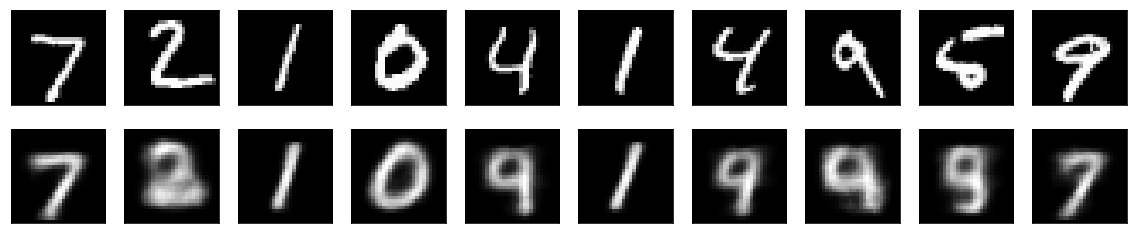

STD of each pixel:  0.19241829
mean of each pixel's RMSE:  0.16026847
total RMSE of each pixel:  0.21466215


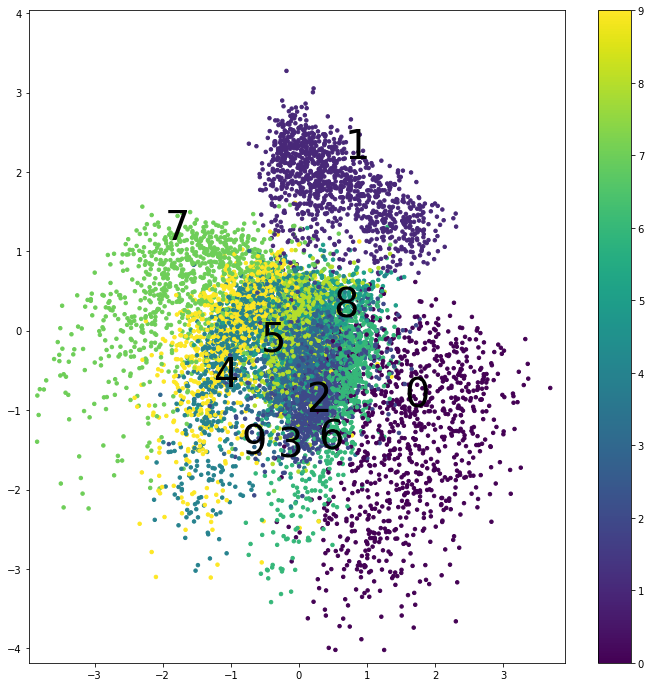

Silhouette score:  0.025928067


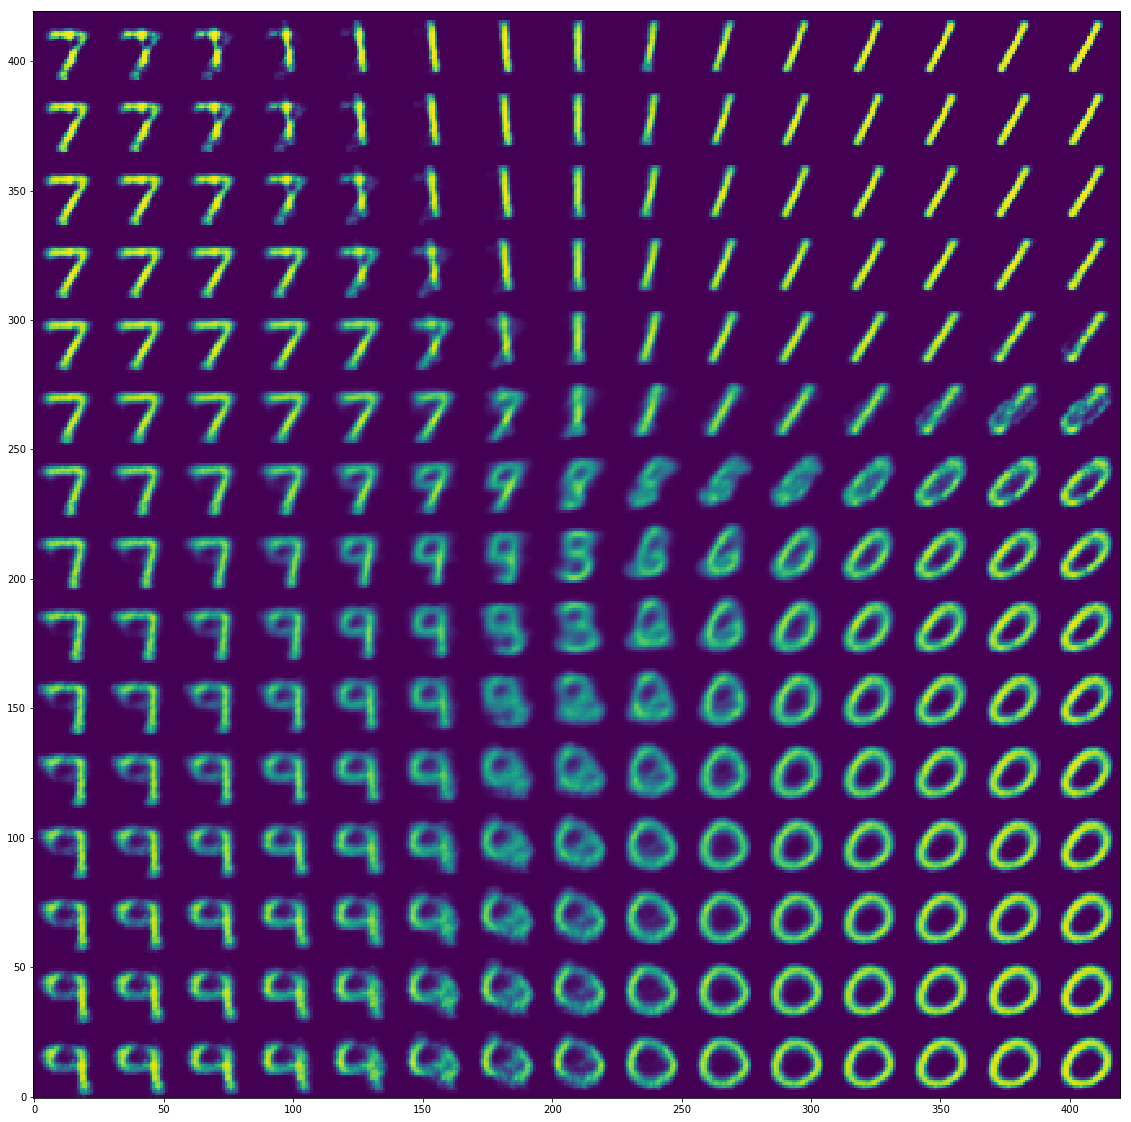

In [19]:
encoder = convVAE.encoder
decoder = convVAE.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
print("STD of each pixel: ", xTest.std(axis=0).mean())
print("mean of each pixel's RMSE: ", rmse(xTest, decodeTest, axis=0).mean())
print("total RMSE of each pixel: ", compReconst(xTest, decodeTest))

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=20000)
scoreSilh = silhouette_score(encodeTest, yTest)
print("Silhouette score: ", scoreSilh)

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)

# Larger latent

In [20]:
layerDense = [128, 64]

convVAE = ConvVAE(dimInput, layerDense=layerDense)
history, timeTrain = convVAE.fit(xTrain, xTest, 
                                 pathTempBest=pathTempBest)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 18s 301us/step - loss: 0.2317 - val_loss: 0.1962

Epoch 00001: val_loss improved from inf to 0.19621, saving model to ../model/temp//AutoEncoder.01-0.23-0.20.hdf5
Epoch 2/50
60000/60000 [==============================] - 16s 270us/step - loss: 0.2008 - val_loss: 0.1791

Epoch 00002: val_loss improved from 0.19621 to 0.17908, saving model to ../model/temp//AutoEncoder.02-0.20-0.18.hdf5
Epoch 3/50
60000/60000 [==============================] - 16s 274us/step - loss: 0.1895 - val_loss: 0.1719

Epoch 00003: val_loss improved from 0.17908 to 0.17185, saving model to ../model/temp//AutoEncoder.03-0.19-0.17.hdf5
Epoch 4/50
60000/60000 [==============================] - 16s 271us/step - loss: 0.1853 - val_loss: 0.1705

Epoch 00004: val_loss improved from 0.17185 to 0.17051, saving model to ../model/temp//AutoEncoder.04-0.19-0.17.hdf5
Epoch 5/50
60000/60000 [==============================

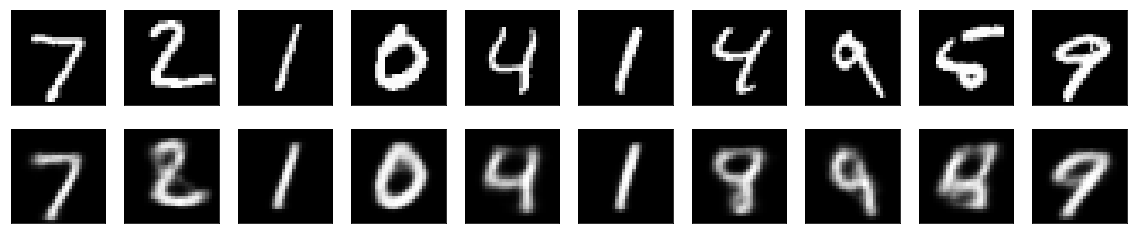

STD of each pixel:  0.19241829
mean of each pixel's RMSE:  0.121082045
total RMSE of each pixel:  0.15964861


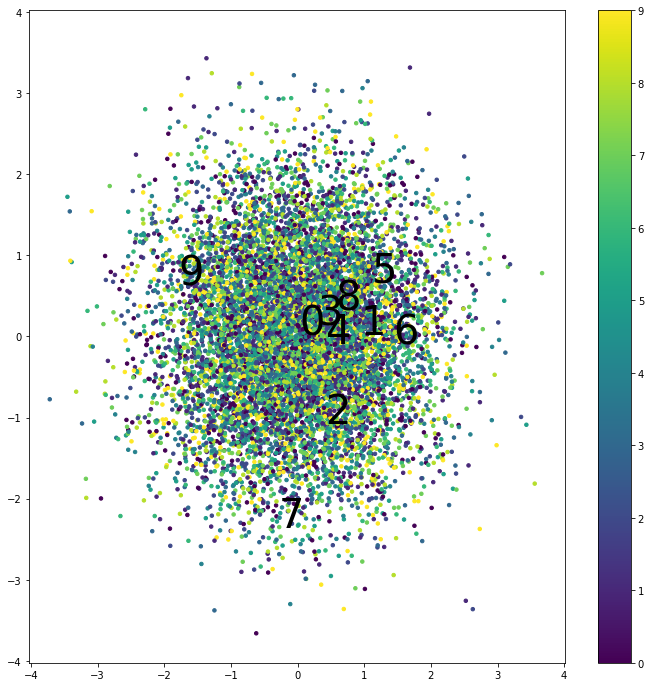

Silhouette score:  0.0061568962


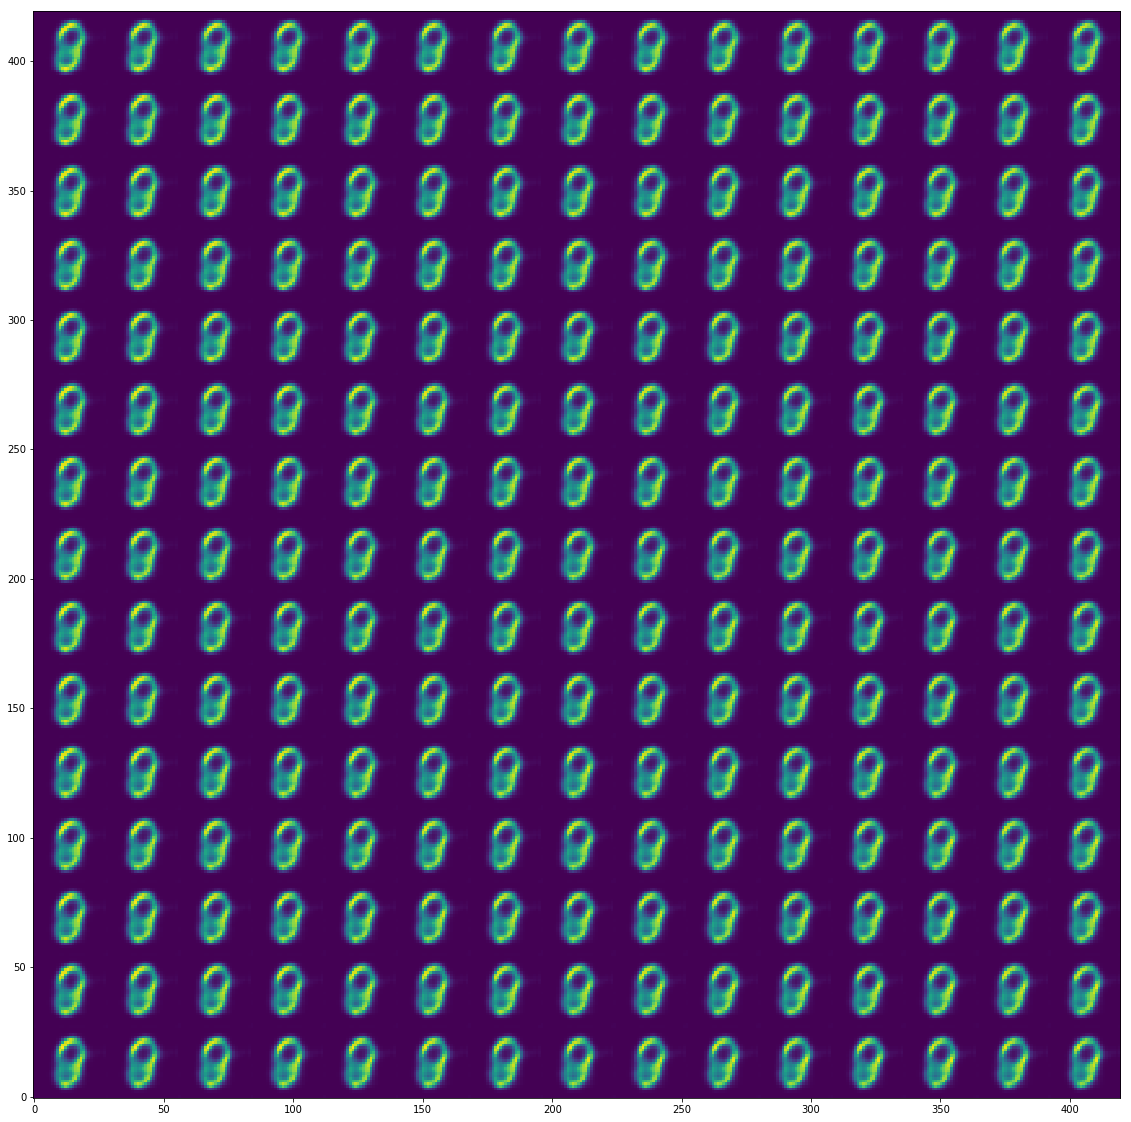

In [21]:
encoder = convVAE.encoder
decoder = convVAE.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
print("STD of each pixel: ", xTest.std(axis=0).mean())
print("mean of each pixel's RMSE: ", rmse(xTest, decodeTest, axis=0).mean())
print("total RMSE of each pixel: ", compReconst(xTest, decodeTest))

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=20000)
scoreSilh = silhouette_score(encodeTest, yTest)
print("Silhouette score: ", scoreSilh)

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)

# Shallow layers

In [22]:
layerDense = [2]
layerConv=[8]

convVAE = ConvVAE(dimInput, layerDense=layerDense, layerConv=layerConv)
history, timeTrain = convVAE.fit(xTrain, xTest, 
                                 pathTempBest=pathTempBest)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 14s 225us/step - loss: 0.2654 - val_loss: 0.2411

Epoch 00001: val_loss improved from inf to 0.24110, saving model to ../model/temp//AutoEncoder.01-0.27-0.24.hdf5
Epoch 2/50
60000/60000 [==============================] - 12s 192us/step - loss: 0.2501 - val_loss: 0.2396

Epoch 00002: val_loss improved from 0.24110 to 0.23961, saving model to ../model/temp//AutoEncoder.02-0.25-0.24.hdf5
Epoch 3/50
60000/60000 [==============================] - 12s 197us/step - loss: 0.2485 - val_loss: 0.2393

Epoch 00003: val_loss improved from 0.23961 to 0.23933, saving model to ../model/temp//AutoEncoder.03-0.25-0.24.hdf5
Epoch 4/50
60000/60000 [==============================] - 12s 192us/step - loss: 0.2474 - val_loss: 0.2391

Epoch 00004: val_loss improved from 0.23933 to 0.23910, saving model to ../model/temp//AutoEncoder.04-0.25-0.24.hdf5
Epoch 5/50
60000/60000 [==============================

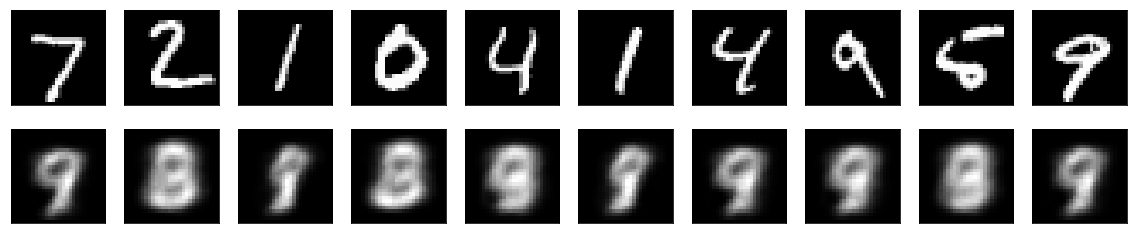

STD of each pixel:  0.19241829
mean of each pixel's RMSE:  0.18042228
total RMSE of each pixel:  0.24325769


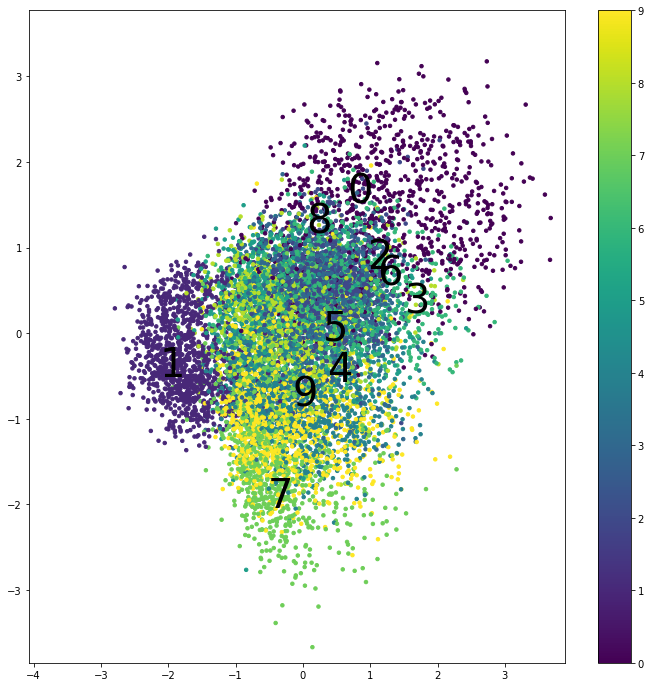

Silhouette score:  -0.023096364


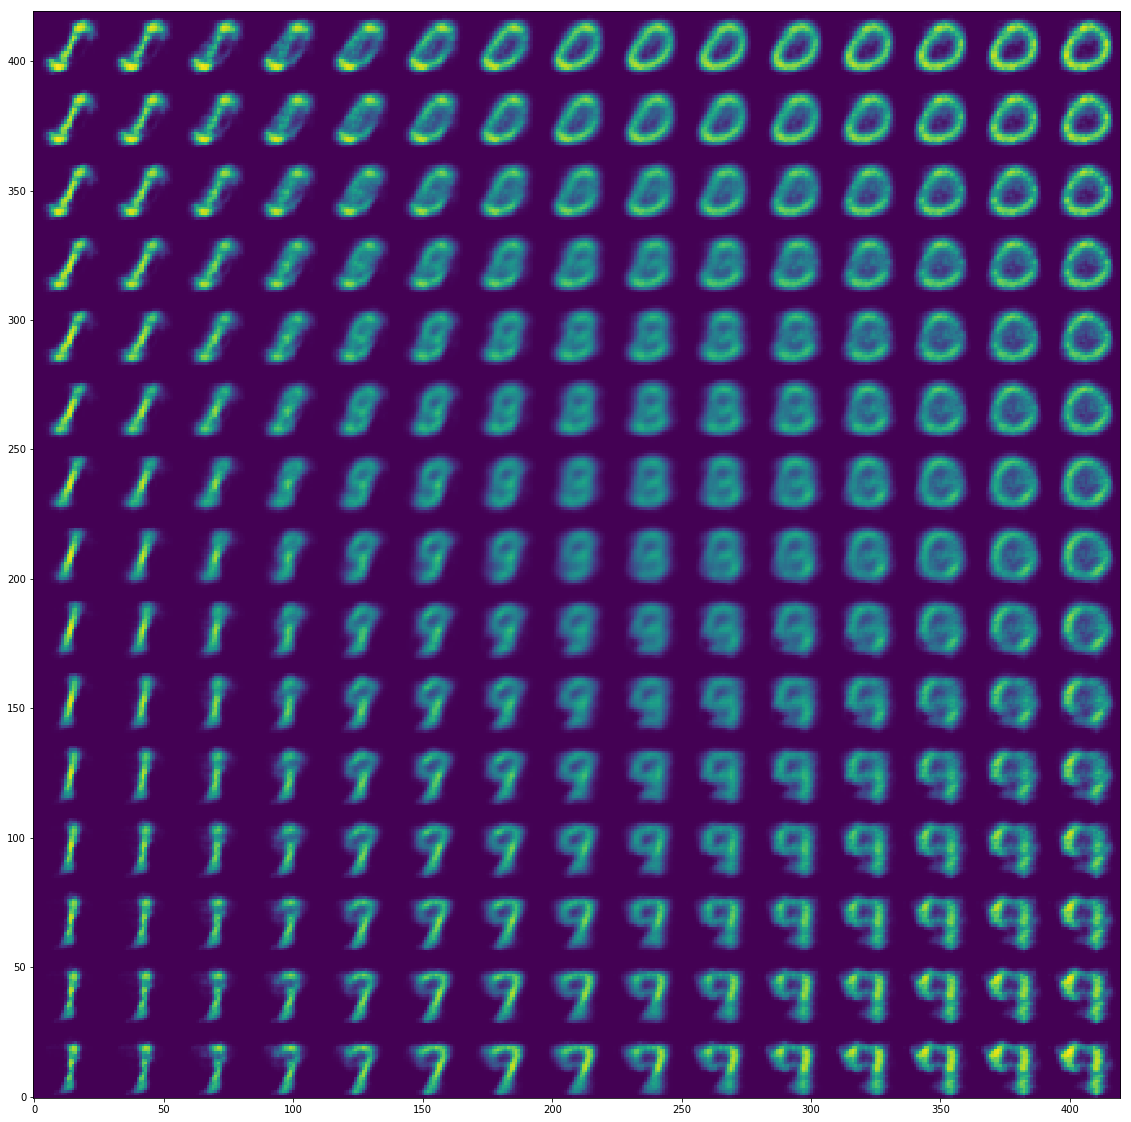

In [23]:
encoder = convVAE.encoder
decoder = convVAE.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
print("STD of each pixel: ", xTest.std(axis=0).mean())
print("mean of each pixel's RMSE: ", rmse(xTest, decodeTest, axis=0).mean())
print("total RMSE of each pixel: ", compReconst(xTest, decodeTest))

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=20000)
scoreSilh = silhouette_score(encodeTest, yTest)
print("Silhouette score: ", scoreSilh)

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)